HW3 - MAT555E - Spring 22
Cem Sanga - sanga@itu.edu.tr
509201104

In [59]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import numpy as np
import pandas as pd
from scipy.io.matlab import loadmat
from scipy.optimize import linear_sum_assignment
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from scipy.stats import chisquare
from seaborn import heatmap

# HW3

## Data preprocessing

In this homework we are going to look at a hyperspectral image dataset called [Salinas](https://rslab.ut.ac.ir/data) dataset.

This scene was collected by the 224-band AVIRIS sensor over Salinas Valley, California, and is characterized by high spatial resolution (3.7-meter pixels). The area covered comprises 512´217. As with Indian Pines scene, we discarded the 20 water absorption bands, in this case bands: [108-112], [154-167], 224. This image was available only as at-sensor radiance data. It includes vegetables, bare soils, and vineyard fields. Salinas ground truth contains 16 classes.

Making some formatting to process the data. I took gt names from the website and reshaped the data to be able to put it inside a pd.Dataframe. In this scheme, reshape stacks every 217 number in a column 512 times, which gives a final row length of 111,104. The columns will be the 204 bands (channels).

In [37]:
salinas = loadmat('data/Salinas_corrected.mat')['salinas_corrected']
salinas[0]

array([[290, 381, 585, ...,  36,  11,  17],
       [290, 381, 519, ...,  36,  11,  15],
       [290, 381, 585, ...,  30,  11,  11],
       ...,
       [373, 482, 594, ...,   6,   4,   0],
       [373, 482, 659, ...,   0,   0,   5],
       [305, 393, 655, ...,   1,   1,  -3]], dtype=int16)

In [38]:
formatted_salinas = salinas.reshape(512*217,204)
formatted_salinas
# salinas[0] = formatted_salinas[0:217,:]
formatted_salinas[0:217,:] # index 0 inclusive, index 217 exclusive.

array([[290, 381, 585, ...,  36,  11,  17],
       [290, 381, 519, ...,  36,  11,  15],
       [290, 381, 585, ...,  30,  11,  11],
       ...,
       [373, 482, 594, ...,   6,   4,   0],
       [373, 482, 659, ...,   0,   0,   5],
       [305, 393, 655, ...,   1,   1,  -3]], dtype=int16)

Here, I am adding an extra name ,"None", to the gt labels to account for the 0 in the data.

In [39]:
salinas_gt = loadmat('data/Salinas_gt.mat')['salinas_gt']
#gt classes
gt_names = ["None","Brocoli_green_weeds_1", "Brocoli_green_weeds_2", "Fallow","Fallow_rough_plow","Fallow_smooth","Stubble","Celery","Grapes_untrained","Soil_vineyard_develop","Corn_senesced_green_weeds","Lettuce_romaine_4wk","Lettuce_romaine_5wk","Lettuce_romaine_6wk","Lettuce_romaine_7wk","Vineyard_untrained","Vineyard_vertical_trellis"]
dict_names = {i : gt_names[i] for i in range(len(gt_names))}
formatted_salinas_gt = salinas_gt.reshape(512*217) #gt --> ground truth.
formatted_salinas_gt.shape

(111104,)

In [40]:
salinas_gt[3,89],formatted_salinas_gt[3*217+89] #salinas_gt[3,89] = formatted_salinas_gt[3*217+89]

(6, 6)

In [41]:
data = pd.DataFrame(formatted_salinas)
X = formatted_salinas
y = formatted_salinas_gt

## Q1 

1. Reshape and split the data into train (80%) and test (20%) data sets.
2. Apply all of the supervised ML algorithms we learned on the data and compare the results.

***
## Solution 1

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((88883, 204), (22221, 204), (88883,), (22221,))

***
### Multiclass Support Vector Machine

***
### K-Nearest Neighbors

Let's see how KNN model reacts with different number of neighbors. I defined an experiment with changing neighbors. The train and test scores are generated with a commented for loop below the definiton. The scores are stored as inputs of lists for easy reference at later times.

In [43]:
def KNN_Experiment(n):
    model_knn = KNeighborsClassifier(n_neighbors=n)
    model_knn.fit(X_train,y_train)
    score = model_knn.score(X_train,y_train)
    pred = model_knn.score(X_test,y_test)
    return score,pred

'''
score_list = []
pred_list = []
for n in range(2,17):
    score,pred = KNN_Experiment(n)
    score_list.append(score)
    pred_list.append(pred)

score_list,pred_list

'''

'\nscore_list = []\npred_list = []\nfor n in range(2,17):\n    score,pred = KNN_Experiment(n)\n    score_list.append(score)\n    pred_list.append(pred)\n\nscore_list,pred_list\n\n'

A plot of the change in the train and test scores depending on the neighbor number is given below. The star on the lower curve indicates the best test score, which is $n=6$.

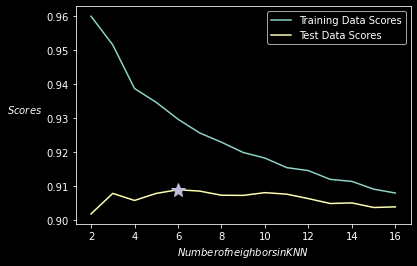

In [58]:

score_list = np.array([0.9600036002385158,
  0.9515767919624675,
  0.938762192995286,
  0.9346894231742853,
  0.929739095215058,
  0.9256888268847812,
  0.922977397252568,
  0.9199509467502222,
  0.9183083379273876,
  0.9155069023322795,
  0.9146180934486909,
  0.9120529235061823,
  0.9114566340020026,
  0.9091727326935409,
  0.9080364074119911])
pred_list = np.array([0.9018946042032312,
 0.9079249358714729,
 0.9058548220152108,
 0.9079249358714729,
 0.9090049952747401,
 0.9085999729985149,
 0.9073849061698394,
 0.9073399036947032,
 0.9081499482471536,
 0.9076999234957923,
 0.9063948517168444,
 0.9049547725124882,
 0.9051347824130327,
 0.9037847081589487,
 0.9039647180594933])

x_range = np.arange(2,17,1)
max_x = np.where(pred_list == max(pred_list))
plt.plot(x_range,score_list, label = "Training Data Scores")
plt.plot(x_range,pred_list, label = "Test Data Scores")
plt.plot(max_x[0] + 2,max(pred_list), marker = "*", markersize = 15)
#plt.axhline(y=max(pred_list), color='gray', linestyle='--')
#plt.axvline(x=np.where(pred_list == max(pred_list)), color='gray', linestyle='--')
plt.xlabel(r"$Number~of~neighbors~in~KNN$")
plt.ylabel(r"$Scores$",rotation = 0,ha = "right")
plt.legend()
plt.show()


Although the best test score is given by $n=6$, the similarity of training and test results might be more important. Let's choose $n=14$ for the model.

In [45]:
model_knn = KNeighborsClassifier(n_neighbors=14)
model_knn.fit(X_train,y_train)
score = model_knn.score(X_train,y_train)
test_score = model_knn.score(X_test,y_test)
y_pred = model_knn.predict(X_test)


In [61]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[10429,    55,    93,    51,    21,    67,    96,    66,    82,
           56,    71,    26,    43,    34,    28,    41,    37],
       [   12,   412,     6,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0],
       [   14,     0,   727,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0],
       [   31,     0,     0,   385,     0,     1,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0],
       [   34,     0,     0,     0,   237,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0],
       [   27,     0,     0,     3,     2,   526,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0],
       [   15,     0,     0,     0,     0,     0,   796,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0],
       [   19,     0,     0,     0,     0,     0

<AxesSubplot:>

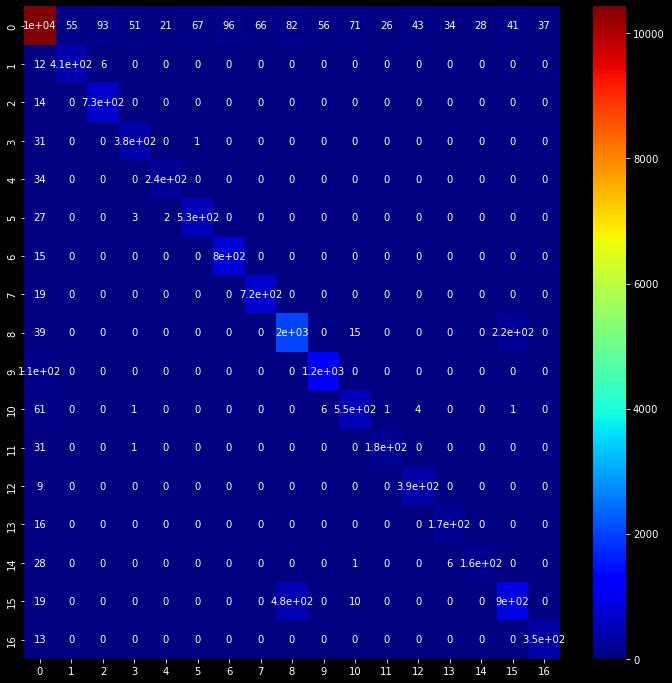

In [69]:
plt.figure(figsize=(12,12))
heatmap(cm,cmap="jet",annot = True)

In [70]:
ResKNN = chisquare(cm,axis=None)
ResKNN

Power_divergenceResult(statistic=1516984.1170964404, pvalue=0.0)

In [71]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94     11296
           1       0.88      0.96      0.92       430
           2       0.88      0.98      0.93       741
           3       0.87      0.92      0.90       417
           4       0.91      0.87      0.89       271
           5       0.89      0.94      0.91       558
           6       0.89      0.98      0.93       811
           7       0.92      0.97      0.94       744
           8       0.78      0.88      0.83      2293
           9       0.95      0.91      0.93      1267
          10       0.85      0.88      0.87       628
          11       0.87      0.85      0.86       215
          12       0.89      0.98      0.93       396
          13       0.81      0.91      0.86       184
          14       0.85      0.82      0.84       195
          15       0.77      0.64      0.70      1415
          16       0.90      0.96      0.93       360

    accuracy              

***
## Q2

Now, apply all of the unsupervised algorithms we have learned so far and compare the results. In order to align the unsupervised labels and true labels use the `linear_sum_assignment` function from `scipy.optimize`. For example, if a confusion matrix looks like:

In [49]:
cm = np.array(
      [[1,10,2],
       [9,2,1],
       [3,4,10]])

we get

In [50]:
rows, cols = linear_sum_assignment(cm,maximize=True)
cm = cm[rows,:]
cm = cm[:,cols]
cm

array([[10,  1,  2],
       [ 2,  9,  1],
       [ 4,  3, 10]])

## Q3

Now compare supervised and unsupervised algorithm results.